<a href="https://colab.research.google.com/github/Apettkopet/uts/blob/main/Uts1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sci
import seaborn as sns
import math
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import os
for dirname, _, filenames in os.walk('/content/CADdataset (1).csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
df = pd.read_csv('/content/CADdataset (1).csv')

In [ ]:
df.head()

,Age,Weight,Height,Sex,BMI,DM,HTN,Current Smoker,Obesity,DLP,...,LVH,PRP,FBS,ESR,EF,RWMA,EX-Smoker,CR,BUN,CAD
0,53,90,175,Male,29.387755,0,1,1,Y,Y,...,N,N,90,7,50,0,0,0.7,8,Cad
1,67,70,157,Fmale,28.398718,0,1,0,Y,N,...,N,N,80,26,40,4,0,1.0,30,Cad
2,54,54,164,Male,20.077335,0,0,1,N,N,...,N,N,85,10,40,2,0,1.0,17,Cad
3,66,67,158,Fmale,26.838648,0,1,0,Y,N,...,N,N,78,76,55,0,0,1.2,30,Normal
4,50,87,153,Fmale,37.165193,0,1,0,Y,N,...,N,N,104,27,50,0,0,1.0,16,Normal


In [ ]:
df.shape

(303, 27)

In [ ]:
#Distribution of values based on data summary: count, mean,std,minimum, first quartile, median, third quartile, and maximum

In [ ]:
df.describe()

,Age,Weight,Height,BMI,DM,HTN,Current Smoker,BP,Typical Chest Pain,St Depression,Tinversion,FBS,ESR,EF,RWMA,EX-Smoker,CR,BUN
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,58.897690,73.831683,164.716172,27.248339,0.297030,0.590759,0.207921,129.554455,0.541254,0.234323,0.297030,119.184818,19.462046,47.231023,0.620462,0.033003,1.055611,17.501650
std,10.392278,11.987358,9.327661,4.098865,0.457706,0.492507,0.406491,18.938105,0.499120,0.424276,0.457706,52.079653,15.936475,8.927194,1.132531,0.178941,0.264296,6.956761
min,30.000000,48.000000,140.000000,18.115413,0.000000,0.000000,0.000000,90.000000,0.000000,0.000000,0.000000,62.000000,1.000000,15.000000,0.000000,0.000000,0.500000,6.000000
25%,51.000000,65.000000,158.000000,24.514380,0.000000,0.000000,0.000000,120.000000,0.000000,0.000000,0.000000,88.500000,9.000000,45.000000,0.000000,0.000000,0.900000,13.000000
50%,58.000000,74.000000,165.000000,26.775510,0.000000,1.000000,0.000000,130.000000,1.000000,0.000000,0.000000,98.000000,15.000000,50.000000,0.000000,0.000000,1.000000,16.000000
75%,66.000000,81.000000,171.000000,29.411765,1.000000,1.000000,0.000000,140.000000,1.000000,0.000000,1.000000,130.000000,26.000000,55.000000,1.000000,0.000000,1.200000,20.000000
max,86.000000,120.000000,188.000000,40.900658,1.000000,1.000000,1.000000,190.000000,1.000000,1.000000,1.000000,400.000000,90.000000,60.000000,4.000000,1.000000,2.200000,52.000000


In [ ]:
#Types of variable the data set

In [ ]:
df.dtypes

Age                     int64
Weight                  int64
Height                  int64
Sex                    object
BMI                   float64
DM                      int64
HTN                     int64
Current Smoker          int64
Obesity                object
DLP                    object
BP                      int64
WPE                    object
Typical Chest Pain      int64
Atypical               object
Nonanginal             object
St Depression           int64
Tinversion              int64
LVH                    object
PRP                    object
FBS                     int64
ESR                     int64
EF                      int64
 RWMA                   int64
EX-Smoker               int64
CR                    float64
BUN                     int64
CAD                    object
dtype: object

In [ ]:
#Cleaning the data

In [ ]:
dup_count = df.duplicated()
df[dup_count]

,Age,Weight,Height,Sex,BMI,DM,HTN,Current Smoker,Obesity,DLP,...,LVH,PRP,FBS,ESR,EF,RWMA,EX-Smoker,CR,BUN,CAD


In [ ]:
dup = df.loc[df['Age'] == 38]
dup

,Age,Weight,Height,Sex,BMI,DM,HTN,Current Smoker,Obesity,DLP,...,LVH,PRP,FBS,ESR,EF,RWMA,EX-Smoker,CR,BUN,CAD
212,38,66,166,Fmale,23.951227,0,0,0,N,N,...,N,N,80,28,55,0,0,0.6,10,Normal
255,38,75,169,Male,26.259585,0,0,0,Y,N,...,N,N,97,3,55,0,0,1.0,26,Normal


In [ ]:
df= df.drop(163)
df.shape

(302, 27)

In [ ]:
null_count = df.isnull().sum()
null_count

Age                   0
Weight                0
Height                0
Sex                   0
BMI                   0
DM                    0
HTN                   0
Current Smoker        0
Obesity               0
DLP                   0
BP                    0
WPE                   0
Typical Chest Pain    0
Atypical              0
Nonanginal            0
St Depression         0
Tinversion            0
LVH                   0
PRP                   0
FBS                   0
ESR                   0
EF                    0
 RWMA                 0
EX-Smoker             0
CR                    0
BUN                   0
CAD                   0
dtype: int64

In [ ]:
#Male vs Female patients age distribution

In [ ]:
df.groupby('Sex').size()

Sex
Fmale    127
Male     175
dtype: int64

Text(0.5, 9.444444444444438, 'Sex (0= female, 1= male)')

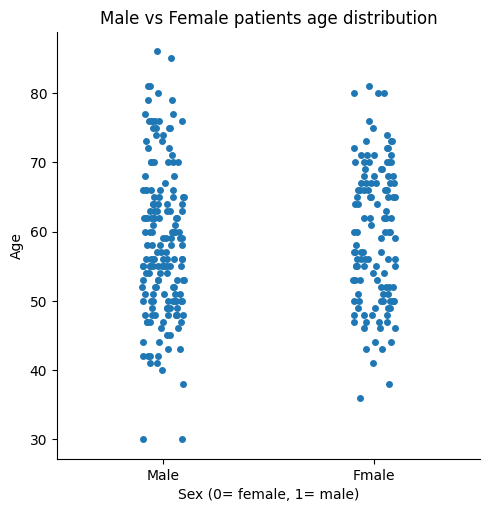

In [ ]:
sns.catplot(x="Sex", y="Age", data=df)
plt.title('Male vs Female patients age distribution')
plt.xlabel('Sex (0= female, 1= male)')

In [ ]:
#Pairwise correlation of all the columns in the dataframe

In [ ]:
df_corr = df.corr()
df_corr.style.background_gradient(cmap = plt.get_cmap('bwr'))

<ipython-input-54-d0f62e7596ff>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df.corr()


,Age,Weight,Height,BMI,DM,HTN,Current Smoker,BP,Typical Chest Pain,St Depression,Tinversion,FBS,ESR,EF,RWMA,EX-Smoker,CR,BUN
Age,1.000000,-0.263347,-0.169159,-0.157069,0.075514,0.244135,-0.142174,0.213890,0.143589,0.180313,0.044781,0.018767,0.180495,-0.130101,0.111308,0.077590,0.220609,0.293170
Weight,-0.263347,1.000000,0.463532,0.725127,-0.004585,-0.027231,0.156688,-0.025061,-0.004750,-0.115615,-0.022106,0.011475,-0.138239,0.022214,-0.008541,0.068710,0.154709,-0.053553
Height,-0.169159,0.463532,1.000000,-0.266055,-0.050077,-0.157210,0.337951,-0.074720,0.027229,-0.148833,0.026138,-0.092174,-0.225752,-0.083591,0.097969,0.079875,0.156510,-0.084059
BMI,-0.157069,0.725127,-0.266055,1.000000,0.042844,0.095399,-0.091760,0.034275,-0.017423,-0.011439,-0.046113,0.086454,0.026570,0.082929,-0.082227,0.004273,0.043173,0.001524
DM,0.075514,-0.004585,-0.050077,0.042844,1.000000,0.220061,-0.209799,0.129355,0.103560,0.014359,-0.060482,0.677412,0.192425,-0.060060,0.063786,-0.120576,0.033305,0.153619
HTN,0.244135,-0.027231,-0.157210,0.095399,0.220061,1.000000,-0.167854,0.569837,0.126173,0.018290,0.117048,0.112020,0.159880,0.040462,0.001142,0.041604,0.154463,0.146879
Current Smoker,-0.142174,0.156688,0.337951,-0.091760,-0.209799,-0.167854,1.000000,-0.078251,0.078332,0.022845,0.200005,-0.102952,-0.120037,-0.075332,0.077620,-0.095012,-0.043162,-0.057285
BP,0.213890,-0.025061,-0.074720,0.034275,0.129355,0.569837,-0.078251,1.000000,0.117201,-0.031315,0.047889,0.147537,0.034767,-0.042567,0.025077,0.029136,0.074194,0.032925
Typical Chest Pain,0.143589,-0.004750,0.027229,-0.017423,0.103560,0.126173,0.078332,0.117201,1.000000,0.053980,0.118093,0.145697,0.076840,-0.116994,0.175623,0.058308,-0.048747,-0.020970
St Depression,0.180313,-0.115615,-0.148833,-0.011439,0.014359,0.018290,0.022845,-0.031315,0.053980,1.000000,0.321653,0.031398,0.080018,-0.021151,0.164185,-0.015317,0.015759,0.023312


In [ ]:
#Distribution showing patients with heart disease and those without heart disease